Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading .json file

In [ ]:
df=pd.read_json("amsterdam.json")
df.head()

ValueError: ignored

In [ ]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [ ]:
df['room_type']=df['room_type'].astype('category').cat.codes
df['instant_bookable']=df['instant_bookable'].astype('category').cat.codes

In [ ]:
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,0,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,0,0
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,0,0
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,0,0
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,0,0


Checking Null values

In [ ]:
Null=[]
for i in df:
 Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

NameError: ignored

In [ ]:
df = df.dropna()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


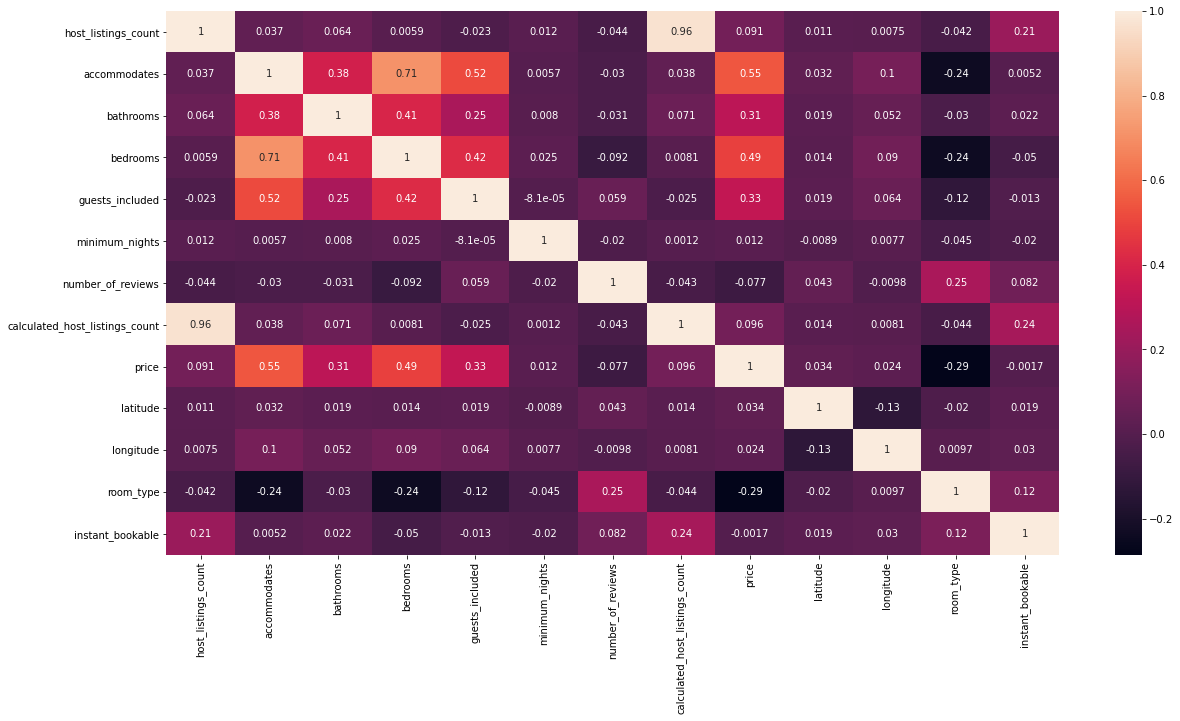

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

Checking Correlation

In [ ]:
df.corr()['price'].sort_values(ascending=False)

price                             1.000000
accommodates                      0.545060
bedrooms                          0.492549
guests_included                   0.328133
bathrooms                         0.308730
calculated_host_listings_count    0.095690
host_listings_count               0.091185
latitude                          0.034054
longitude                         0.024372
minimum_nights                    0.011585
instant_bookable                 -0.001714
number_of_reviews                -0.077378
room_type                        -0.285400
Name: price, dtype: float64

Feature Selection

In [ ]:
df1=df[["accommodates","bedrooms","guests_included","bathrooms","room_type","price"]]
df1.head()

,accommodates,bedrooms,guests_included,bathrooms,room_type,price
0,6,2.0,1,1.0,0,145.0
1,2,1.0,1,1.0,0,88.0
2,2,1.0,2,1.0,0,130.0
3,4,2.0,2,1.0,0,110.0
4,2,1.0,1,1.0,0,115.0


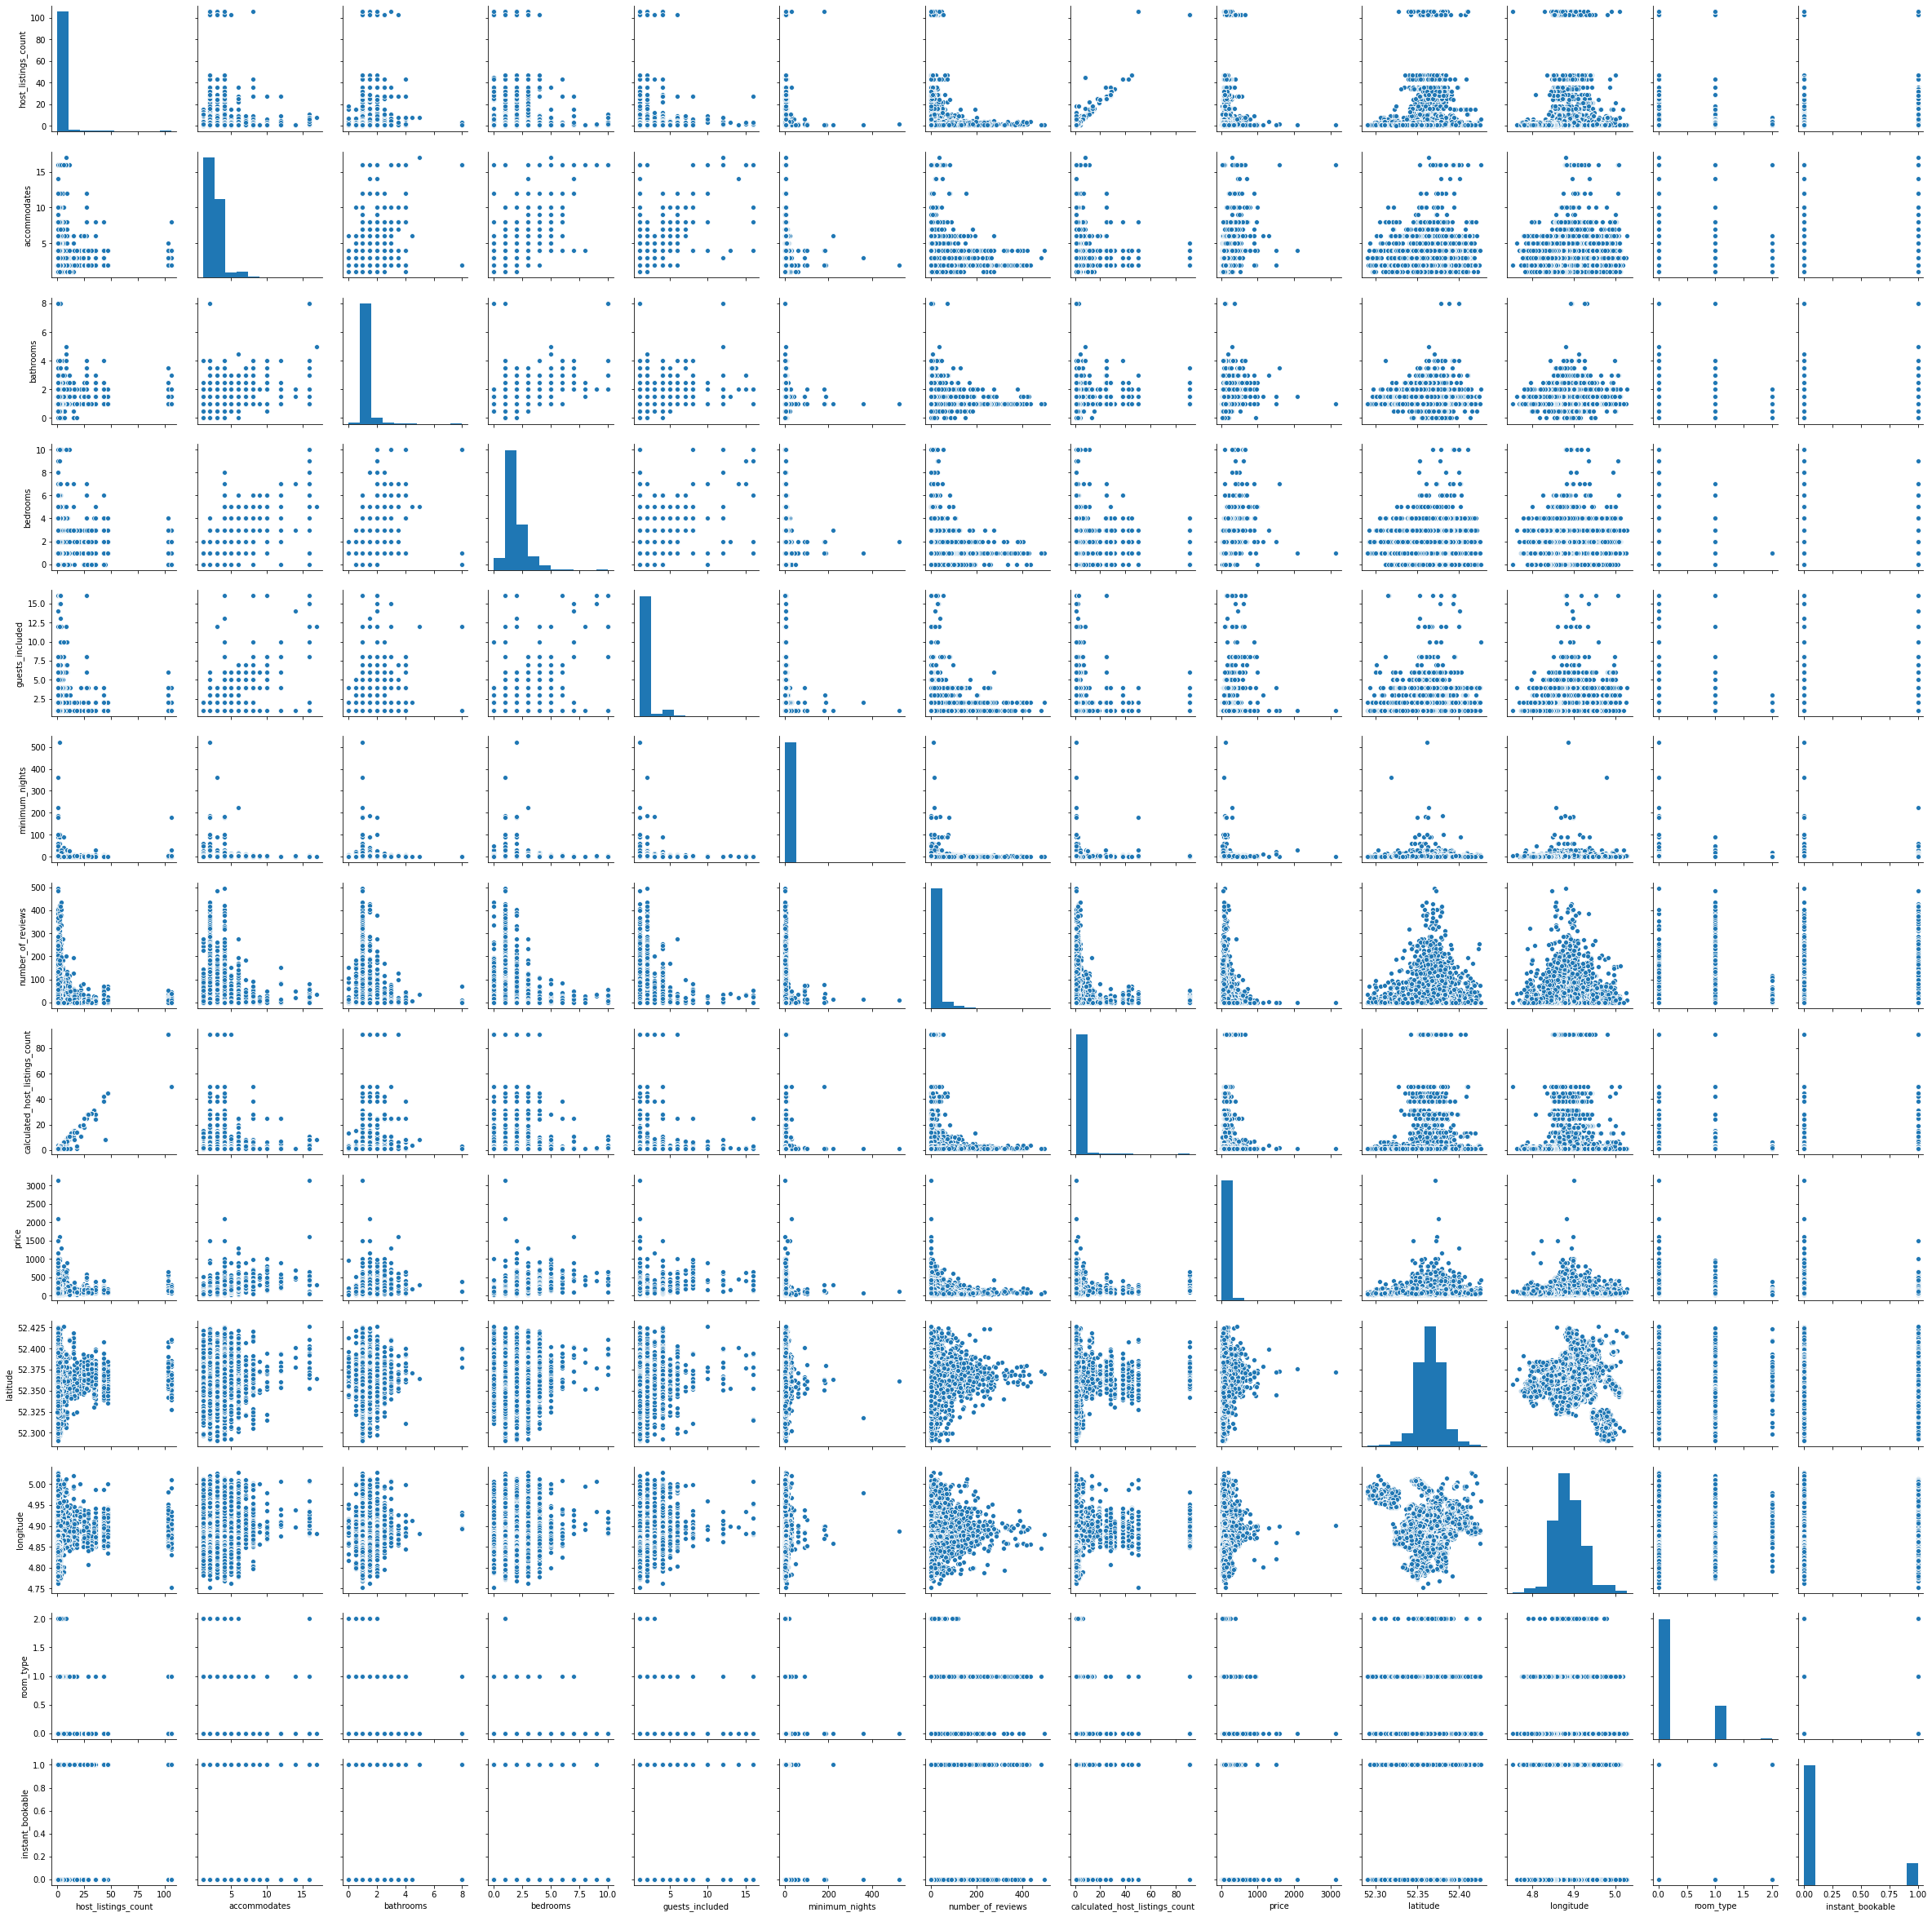

In [ ]:
sns.pairplot(df)

Dividing dataset into independent  and dependent variables.


In [ ]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

Splitting the dataset into training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **Random Forest Regressor**

In [ ]:
Changing the params to get least error

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor() 
n_estimators = [10,20,30,40,50]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(forest, param, cv = 3, verbose = 1,n_jobs = -1)
model=grid.fit(x_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.1min finished


In [ ]:
print(grid.best_params_)
print(grid.best_score_) 

{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 30}
0.40838473047445595


Testing the model

In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score  as r2
from sklearn.metrics import mean_squared_error  as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
print("Mean squared error: ",mse(y_pred,y_test))
print("Mean absolute error: ",mae(y_pred,y_test))
print("R2 Score: ",r2(y_test,y_pred))

Mean squared error:  6672.541541085536
Mean absolute error:  38.66745866121504
R2 Score:  0.2749901639975796


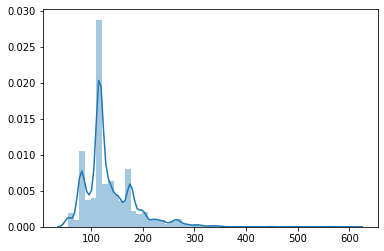

In [ ]:
sns.distplot(y_pred)